In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from fbprophet import Prophet

In [2]:
data = pd.read_csv('data/train_with_holidays.csv')
data

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,date,is_holiday
0,2020-01-01 00,42.9,0.718,15.7,73.1,64.4,2020-01-01 00:00:00,True
1,2020-01-01 01,33.6,0.587,10.1,74.8,66.0,2020-01-01 01:00:00,True
2,2020-01-01 02,29.3,NaN,5.1,51.0,44.9,2020-01-01 02:00:00,True
3,2020-01-01 03,30.5,0.246,7.2,27.7,25.1,2020-01-01 03:00:00,True
4,2020-01-01 04,29.3,0.204,8.3,15.3,13.6,2020-01-01 04:00:00,True
...,...,...,...,...,...,...,...,...
40986,2024-09-03 18,NaN,0.222,55.1,12.0,5.3,2024-09-03 18:00:00,False
40987,2024-09-03 19,NaN,0.245,48.2,13.4,7.0,2024-09-03 19:00:00,False
40988,2024-09-03 20,NaN,0.234,44.5,12.4,7.1,2024-09-03 20:00:00,False
40989,2024-09-03 21,NaN,0.225,25.9,10.6,5.4,2024-09-03 21:00:00,False


In [3]:
data['date'] = pd.to_datetime(data['id'])
data.set_index('date', inplace=True)

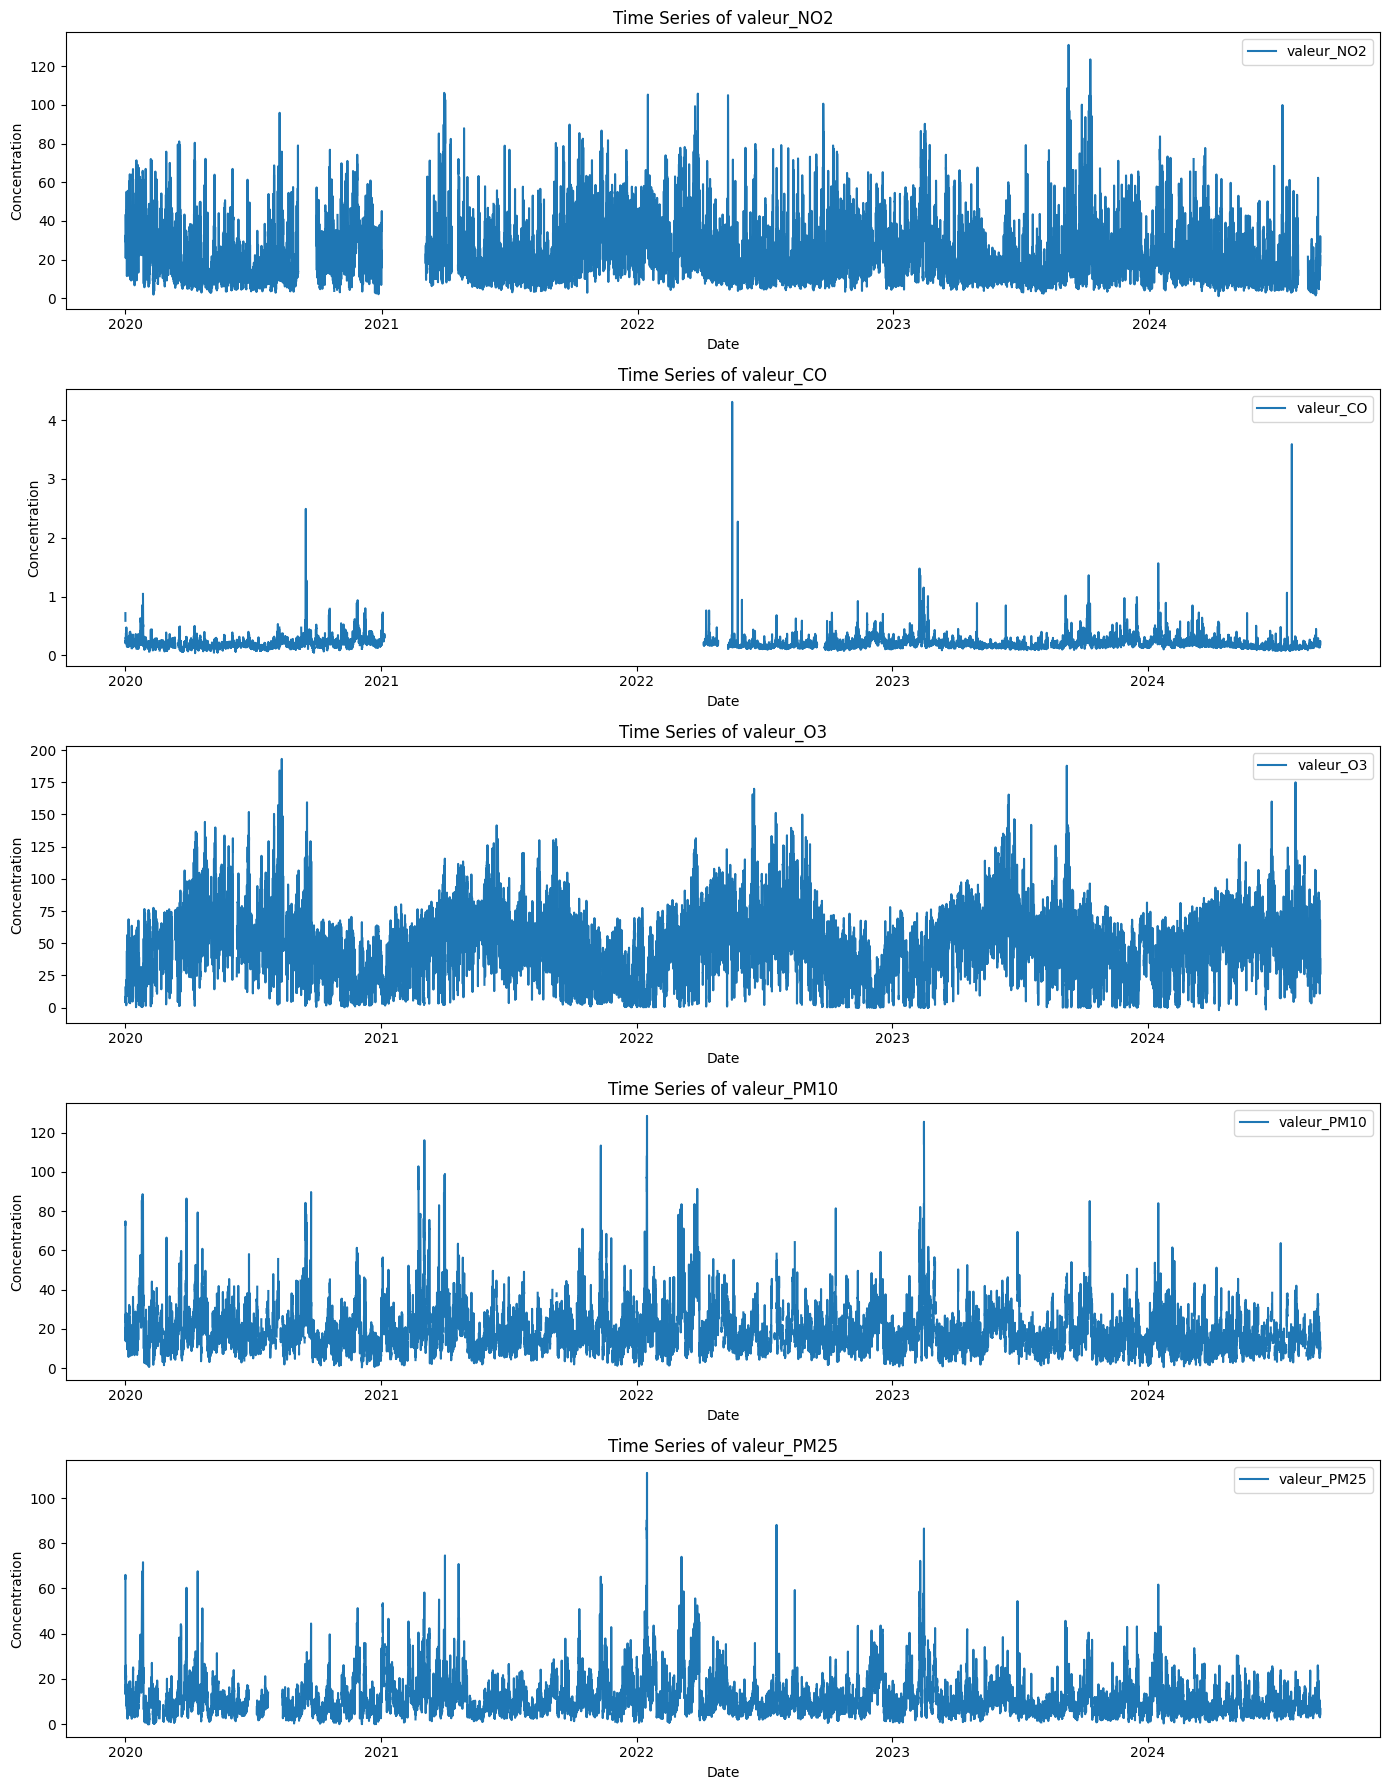

In [4]:
numeric_data = data.select_dtypes(include=['number'])
# Resample data to weekly means
weekly_data = numeric_data.resample('D').mean()

pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

plt.figure(figsize=(14, 18))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(5, 1, i)  # 5 rows, 1 column, i-th subplot
    plt.plot(data.index, data[pollutant], label=pollutant)
    plt.title(f'Time Series of {pollutant}')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [6]:
numeric_data = numeric_data.fillna(method='ffill') 

/var/folders/06/38r1ks_x7bj1pb0p5j8sp6wc0000gn/T/ipykernel_83737/113388313.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numeric_data = numeric_data.fillna(method='ffill')


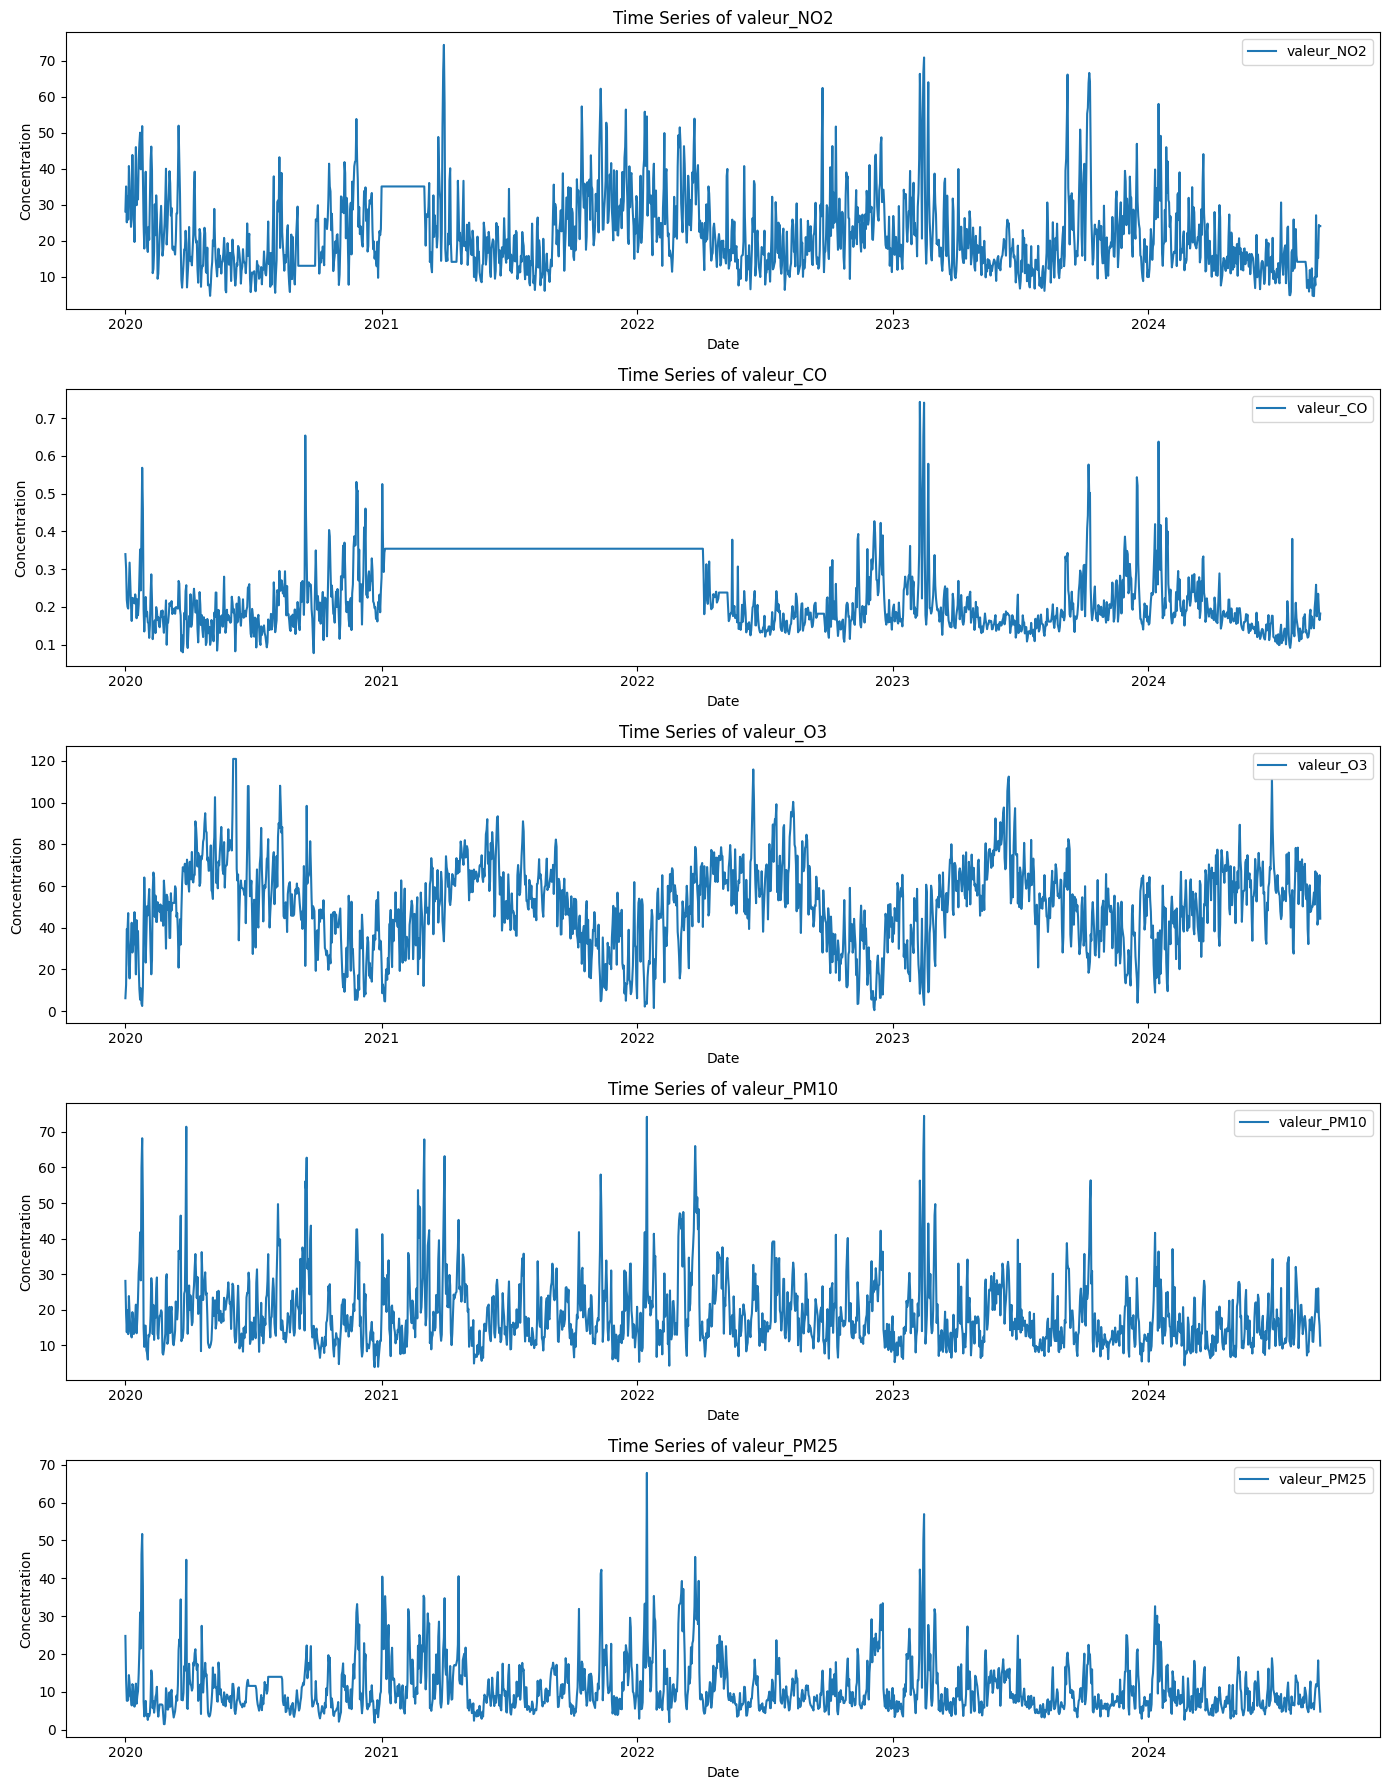

In [9]:
# Resample data to weekly means
weekly_data = numeric_data.resample('D').mean()

pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

plt.figure(figsize=(14, 18))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(5, 1, i)  # 5 rows, 1 column, i-th subplot
    plt.plot(weekly_data.index, weekly_data[pollutant], label=pollutant)
    plt.title(f'Time Series of {pollutant}')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()